<a href="https://colab.research.google.com/github/sierrahotel777/220701251-CS19P18-DLC-Experiments/blob/main/DLC_3_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import libraries

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

2. Load the CIFAR-10 dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 31s 0us/step


Class names for CIFAR-10

In [ ]:
class_names = ['airplane', 'car', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

Visualize some sample images

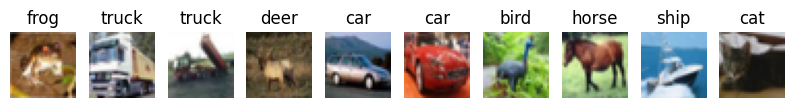

In [ ]:
plt.figure(figsize=(10,2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()

3. Preprocess the data

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

4. Build the CNN model

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5. Compile the model

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

6. Train the model

In [ ]:
history = model.fit(x_train, y_train, epochs=15, batch_size=64,
                    validation_data=(x_test, y_test))

Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 105s 132ms/step - accuracy: 0.2973 - loss: 1.8843 - val_accuracy: 0.5486 - val_loss: 1.2651
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 146s 138ms/step - accuracy: 0.5176 - loss: 1.3410 - val_accuracy: 0.5840 - val_loss: 1.1616
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 138s 133ms/step - accuracy: 0.5992 - loss: 1.1279 - val_accuracy: 0.6758 - val_loss: 0.9288
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 140s 130ms/step - accuracy: 0.6551 - loss: 0.9960 - val_accuracy: 0.6552 - val_loss: 0.9772
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 131ms/step - accuracy: 0.6874 - loss: 0.9019 - val_accuracy: 0.7142 - val_loss: 0.8194
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 143s 132ms/step - accuracy: 0.7149 - loss: 0.8261 - val_accuracy: 0.7138 - val_loss: 0.8303
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 133ms/step - accuracy: 0.7317 - loss: 0.7691 - val_accuracy: 0.7369 - val_loss: 0.7766
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 145s 137ms/step - accuracy: 0.7507 -

7. Evaluate the model on test data

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest accuracy: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.7652 - loss: 0.7557

Test accuracy: 75.75%


8. Perform predictions on test images

In [ ]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step


9. Visualize prediction results with sample images

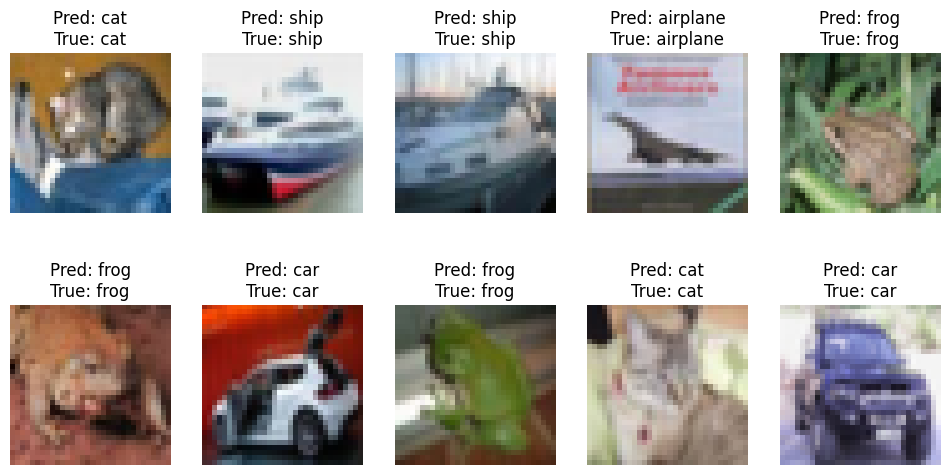

In [ ]:
plt.figure(figsize=(12,6))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i])
    pred_label = class_names[np.argmax(predictions[i])]
    true_label = class_names[np.argmax(y_test[i])]
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}")
    plt.axis('off')
plt.show()